### 朴素贝叶斯（Naive Bayes）算法详解


#### 一、核心概念  
朴素贝叶斯是基于**贝叶斯定理**和**特征条件独立性假设**的监督学习算法，核心用于分类任务（尤其适合高维稀疏数据）。其核心思想是：通过训练数据学习特征与类别的联合概率分布，再利用贝叶斯定理预测新样本属于某类别的后验概率，选择概率最大的类别作为预测结果。  

- **关键术语**：  
  - **先验概率**：某类别的概率（如“垃圾邮件占所有邮件的20%”），记为 $ P(Y = c) $；  
  - **似然概率**：给定类别时特征的概率（如“垃圾邮件中出现‘中奖’的概率为80%”），记为 $ P(X = x \mid Y = c) $；  
  - **后验概率**：给定特征时类别的概率（如“含‘中奖’的邮件是垃圾邮件的概率”），记为 $ P(Y = c \mid X = x) $；  
  - **特征条件独立性假设**：假设给定类别时，所有特征相互独立（简化计算的“朴素”之处）。  


#### 二、数学模型与核心原理  
朴素贝叶斯的核心是贝叶斯定理，结合特征独立性假设简化计算：  


##### 1. 贝叶斯定理  
$$ P(Y = c \mid X = x) = \frac{P(Y = c)P(X = x \mid Y = c)}{P(X = x)} $$  

- 分母 $ P(X = x) $ 为证据因子，对所有类别相同，预测时可忽略；  
- 目标是找到使后验概率最大的类别 $ c $：  
  $$ \hat{y} = \arg\max_c P(Y = c)P(X = x \mid Y = c) $$  


##### 2. 特征条件独立性假设  
假设特征 $ x_1, x_2, ..., x_n $ 相互独立，则：  
$$ P(X = x \mid Y = c) = \prod_{i=1}^n P(X_i = x_i \mid Y = c) $$  

- 极大简化计算（无需计算高维联合概率）；  
- 实际中特征可能不独立，但朴素贝叶斯仍常表现良好（对噪声和缺失值稳健）。  


##### 3. 常见变体（按似然概率分布划分）  
| 算法 | 似然概率分布 | 适用特征类型 | 典型场景 |  
|------|--------------|--------------|----------|  
| 高斯朴素贝叶斯（GaussianNB） | 高斯分布（正态分布） | 连续特征 | 数值型数据（如鸢尾花分类） |  
| 多项式朴素贝叶斯（MultinomialNB） | 多项式分布 | 离散计数特征（如词频） | 文本分类（如垃圾邮件检测） |  
| 伯努利朴素贝叶斯（BernoulliNB） | 伯努利分布（0/1） | 二元特征（如词是否出现） | 文本分类、推荐系统 |  


#### 三、适用场景  
- **任务类型**：主要用于**分类任务**（二分类或多分类），尤其适合高维稀疏数据。  
- **数据要求**：  
  - 适用于**高维稀疏数据**（如文本数据，特征为词向量）；  
  - 对缺失值不敏感（可通过频率估计填充）；  
  - 训练速度快（复杂度与样本数、特征数线性相关）。  
- 典型场景：  
  - 文本分类（如垃圾邮件识别、情感分析）；  
  - 推荐系统（如基于用户行为的物品推荐）；  
  - 医疗诊断（如疾病筛查，特征为症状）。  


#### 四、实践要点  
1. **特征预处理**：  
   - 连续特征：高斯朴素贝叶斯无需预处理（假设正态分布）；  
   - 离散特征：多项式/伯努利朴素贝叶斯需转换为计数或二元值（如词频、是否出现）。  

2. **平滑处理**：  
   - 避免似然概率为0（某特征在某类别中未出现过），需添加平滑项：  
     - 拉普拉斯平滑：$ P(X_i = x_i \mid Y = c) = \frac{N_{c,i} + 1}{N_c + K} $（$ K $ 为特征可能取值数）；  
     - 利德斯通平滑：$ P(X_i = x_i \mid Y = c) = \frac{N_{c,i} + \lambda}{N_c + K\lambda} $（$ \lambda > 0 $，通常取0.1）。  

3. **参数调优**：  
   - 高斯朴素贝叶斯：可调参数少，主要关注特征是否符合正态分布；  
   - 多项式朴素贝叶斯：重点调优平滑参数 $ \alpha $（$ \alpha = 1 $ 为拉普拉斯平滑）。  


#### 五、评估指标怎么选？  
同其他分类算法，根据任务需求选择：  
- **准确率（Accuracy）**：适用于样本平衡场景；  
- **精确率/召回率/F1**：适用于不平衡数据（如垃圾邮件识别，优先高精确率）；  
- **AUC**：评估模型区分能力，对不平衡数据鲁棒；  
- **混淆矩阵**：直观展示各类别预测错误情况。  


#### 六、优缺点  
- **优点**：  
  1. 训练速度极快（复杂度低，适合大数据集）；  
  2. 对高维稀疏数据表现优异（如文本分类）；  
  3. 对缺失值和噪声数据稳健；  
  4. 可解释性强（概率直观）。  

- **缺点**：  
  1. 特征独立性假设可能不成立（实际中特征常相关，可能影响性能）；  
  2. 对罕见事件预测差（似然概率易为0，需依赖平滑）；  
  3. 难以捕捉特征间的交互关系。  


#### 七、代码实例（3个独立Python文件）  


##### 1. 简洁版：手撕高斯朴素贝叶斯 

测试集准确率：1.0000


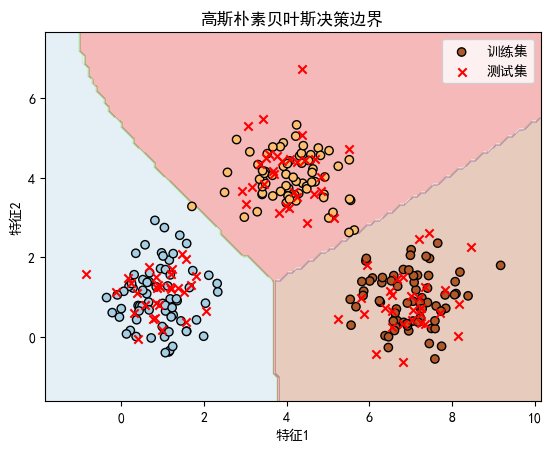

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 生成模拟数据（二维连续特征，3个类别）
np.random.seed(42)
# 类别0：均值(1,1)，方差0.5
X0 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], 100)
# 类别1：均值(4,4)，方差0.5
X1 = np.random.multivariate_normal([4, 4], [[0.5, 0], [0, 0.5]], 100)
# 类别2：均值(7,1)，方差0.5
X2 = np.random.multivariate_normal([7, 1], [[0.5, 0], [0, 0.5]], 100)

X = np.vstack([X0, X1, X2])
y = np.hstack([np.zeros(100), np.ones(100), np.full(100, 2)])  # 标签0,1,2

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# 3. 高斯朴素贝叶斯实现
class GaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = None  # 每个类别每个特征的均值
        self.var = None  # 每个类别每个特征的方差
        self.prior = None  # 先验概率

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]

        # 初始化均值、方差、先验概率
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.prior = np.zeros(n_classes)

        # 计算每个类别的统计量
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]  # 类别c的所有样本
            self.mean[idx, :] = X_c.mean(axis=0)  # 均值
            self.var[idx, :] = X_c.var(axis=0)  # 方差
            self.prior[idx] = X_c.shape[0] / X.shape[0]  # 先验概率（频率估计）

    def _gaussian_prob(self, x, mean, var):
        """计算高斯分布概率密度：P(x|mean, var)"""
        eps = 1e-6  # 防止方差为0导致除零
        exponent = np.exp(-(x - mean) ** 2 / (2 * (var + eps)))
        return (1 / np.sqrt(2 * np.pi * (var + eps))) * exponent

    def predict(self, X):
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_sample(self, x):
        """预测单个样本的类别"""
        posteriors = []
        for idx, c in enumerate(self.classes):
            # 计算后验概率（对数形式，避免数值下溢）
            prior = np.log(self.prior[idx])
            # 似然概率：特征独立假设，乘积转对数和
            likelihood = np.sum(np.log(self._gaussian_prob(x, self.mean[idx, :], self.var[idx, :])))
            posterior = prior + likelihood
            posteriors.append(posterior)

        # 返回后验概率最大的类别
        return self.classes[np.argmax(posteriors)]


# 4. 训练与评估
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率：{accuracy:.4f}")


# 5. 可视化决策边界（修复了警告问题）
def plot_boundary(model):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', label="训练集")
    # 修复：对于'x'标记，直接设置颜色参数c而非edgecolor
    plt.scatter(X_test[:, 0], X_test[:, 1], c='r', marker='x', label="测试集")
    plt.xlabel("特征1")
    plt.ylabel("特征2")
    plt.title("高斯朴素贝叶斯决策边界")
    plt.legend()
    plt.show()


plot_boundary(model)

##### 2. 简洁版：sklearn实现朴素贝叶斯（文本分类） 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 加载文本数据集（20新闻组的子集）
categories = ['sci.space', 'rec.sport.baseball', 'talk.politics.misc']  # 三个类别

# 从sklearn的20新闻组数据集中加载指定类别的全部数据，
# 并移除文章的头部信息、尾部信息和引用内容，
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

X_text = newsgroups.data  # 文本内容
y = newsgroups.target  # 标签（0:太空, 1:棒球, 2:政治）
class_names = newsgroups.target_names

# 打印各类别的样本数量
for i, cls in enumerate(class_names):
    print(f"{cls} 类别样本数量: {np.sum(y == i)}")

rec.sport.baseball 类别样本数量: 994
sci.space 类别样本数量: 987
talk.politics.misc 类别样本数量: 775


In [30]:
# 2. 文本特征提取（词频向量）
vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # CountVectorizer转换器 用于将文本数据转换为数值型的词频矩阵
X = vectorizer.fit_transform(X_text)  # 转换为词频矩阵（稀疏矩阵）
print(f"特征数：{X.shape[1]}（词表大小）")

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. 训练多项式朴素贝叶斯（适合离散计数特征）
model = MultinomialNB(alpha=1)  # alpha=1为拉普拉斯平滑
model.fit(X_train, y_train)

# 5. 评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率：{accuracy:.4f}")

特征数：1000（词表大小）
测试集准确率：0.8755


In [31]:
# 6. 分析特征重要性（每个类别最具区分度的词）
def show_top_words(model, vectorizer, class_names, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()

    # 1) enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出
    # 数据和数据下标，一般用在 for 循环当中。
    # 2) enumerate(class_names) 会返回一个迭代器，每次迭代会产生一个包含两个元素的元组，第一个元素是
    # 索引（从 0 开始），第二个元素是 class_names 里对应索引位置的元素。
    for i, class_name in enumerate(class_names):
        # 提取当前类别的词概率（log概率）
        word_log_probs = model.feature_log_prob_[i]
        # 取概率最高的n_top_words个词
        # np.argsort(word_log_probs) 返回按升序排列的索引数组,word_log_probs对应的索引和特征索引一致
        # [-n_top_words:][::-1]为Python 列表或数组的切片语法
        top_indices = np.argsort(word_log_probs)[-n_top_words:][::-1]

        top_words = [feature_names[idx] for idx in top_indices]
        print(f"\n类别 {class_name} 的Top {n_top_words} 特征词：\n{top_words}")


show_top_words(model, vectorizer, class_names)


类别 rec.sport.baseball 的Top 10 特征词：
['year', 'game', 'don', 'think', 'team', 'good', 'games', 'just', 'baseball', 'time']

类别 sci.space 的Top 10 特征词：
['space', 'nasa', 'launch', 'earth', 'like', 'time', 'just', 'orbit', 'data', 'shuttle']

类别 talk.politics.misc 的Top 10 特征词：
['people', 'president', 'think', 'don', 'know', 'mr', 'going', 'just', 'myers', 'ms']


随机样本的预测概率：
[[1.00000000e+00 1.26363636e-55 1.03684327e-56]
 [6.15899883e-06 9.99973480e-01 2.03607951e-05]
 [1.78664609e-38 3.15329222e-19 1.00000000e+00]
 [1.00000000e+00 5.60205763e-51 3.47227394e-55]
 [7.62507821e-04 9.75807157e-01 2.34303348e-02]]


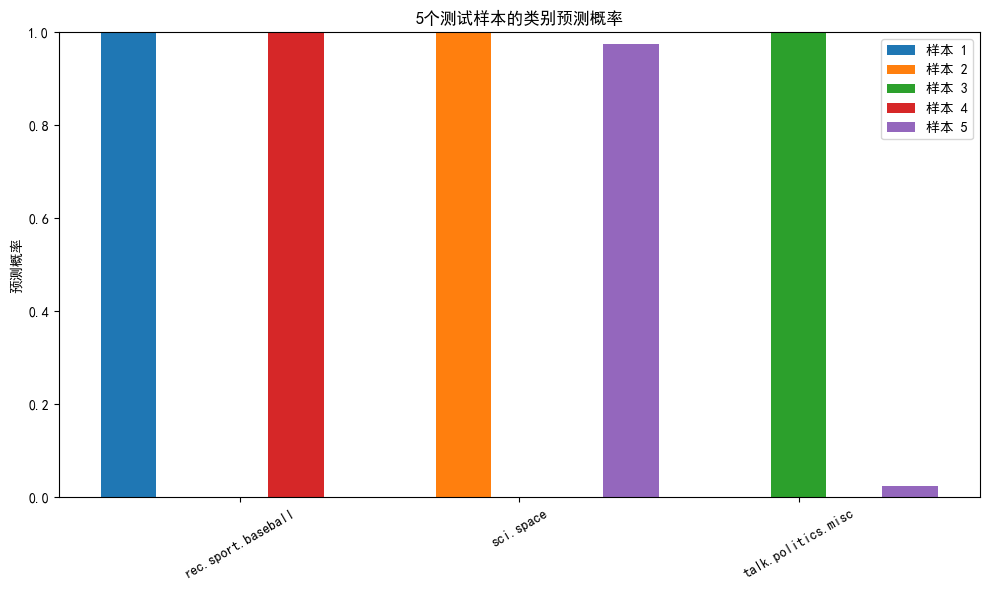

In [32]:
# 7. 可视化类别预测概率（确保每个类别至少有一个样本）
np.random.seed(42)
sample_indices = []
for cls in range(len(class_names)):
    cls_indices = np.where(y_test == cls)[0]
    if len(cls_indices) > 0:
        sample_indices.append(np.random.choice(cls_indices))

# 若样本不足 5 个，随机补充
remaining = 5 - len(sample_indices)
if remaining > 0:
    all_indices = np.arange(len(y_test))
    extra_indices = np.random.choice(np.setdiff1d(all_indices, sample_indices), remaining, replace=False)
    sample_indices.extend(extra_indices)

sample_probs = model.predict_proba(X_test.tocsr()[sample_indices])

# 打印预测概率，确认数值情况
print("随机样本的预测概率：")
print(sample_probs)

plt.figure(figsize=(10, 6))
bar_width = 0.2
for i in range(5):
    positions = np.arange(3) + i * bar_width
    plt.bar(positions, sample_probs[i], width=bar_width, label=f"样本 {i + 1}")

# 调整刻度位置，使类别标签居中显示
plt.xticks(np.arange(3) + bar_width * 2, class_names, rotation=30)
plt.ylabel("预测概率")
plt.title("5个测试样本的类别预测概率")
plt.legend()
plt.ylim(0, 1)  # 设置y轴范围为0到1
plt.tight_layout()  # 自动调整布局
plt.show()

##### 3. 全面版：sklearn实现（多模型对比+调优）  

=== 测试1：高斯朴素贝叶斯（连续特征） ===
乳腺癌数据集：(569, 30)，类别分布：[212 357]（恶性/良性）

--- 高斯朴素贝叶斯评估 ---
准确率：0.9474
精确率：0.9375
召回率：0.9813
F1分数：0.9589
AUC：0.9901



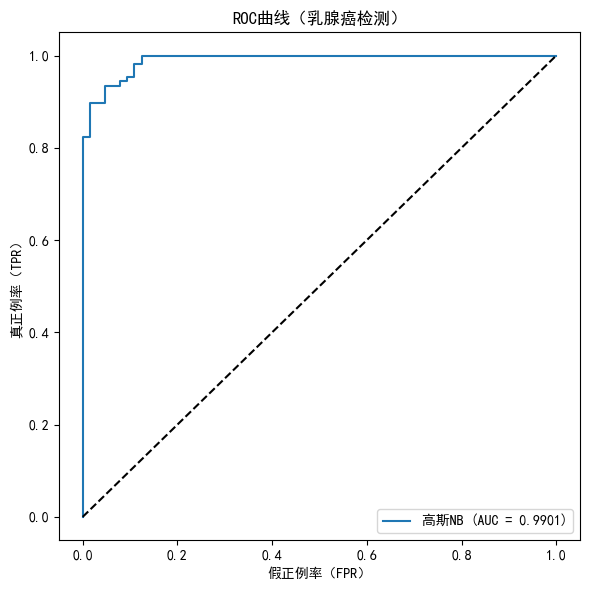

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_breast_cancer, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve
)

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False


# 1. 连续特征数据集测试（乳腺癌检测）
def test_continuous_data():
    # 加载数据
    data = load_breast_cancer()
    X, y = data.data, data.target
    # stratify=y 的作用是保证划分后的训练集和测试集中各类别样本的比例与原始数据集中各类别样本的比例相同。
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    print(f"乳腺癌数据集：{X.shape}，类别分布：{np.bincount(y)}（恶性/良性）\n")

    # 高斯朴素贝叶斯（适合连续特征）
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # 良性概率

    # 评估（简化输出，避免过长）
    print("--- 高斯朴素贝叶斯评估 ---")
    print(f"准确率：{accuracy_score(y_test, y_pred):.4f}")
    print(f"精确率：{precision_score(y_test, y_pred):.4f}")
    print(f"召回率：{recall_score(y_test, y_pred):.4f}")
    print(f"F1分数：{f1_score(y_test, y_pred):.4f}")
    print(f"AUC：{roc_auc_score(y_test, y_pred_proba):.4f}\n")

    # 绘制ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"高斯NB (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # 随机猜测基线
    plt.xlabel("假正例率（FPR）")
    plt.ylabel("真正例率（TPR）")
    plt.title("ROC曲线（乳腺癌检测）")
    plt.legend()
    plt.tight_layout()
    plt.show()


print("=== 测试1：高斯朴素贝叶斯（连续特征） ===")
test_continuous_data()


=== 测试2：多项式/伯努利朴素贝叶斯（文本特征） ===
新闻数据集：1981样本，类别：['rec.sport.baseball', 'sci.space']

--- 多项式NB评估 ---
准确率：0.8924
分类报告（简化）：
  rec.sport.baseball：精确率=0.8507, 召回率=0.9532
  sci.space：精确率=0.9462, 召回率=0.8311

--- 伯努利NB评估 ---
准确率：0.8689
分类报告（简化）：
  rec.sport.baseball：精确率=0.7995, 召回率=0.9866
  sci.space：精确率=0.9823, 召回率=0.7500

最优参数：{'alpha': 0.1}
最优交叉验证F1：0.9154



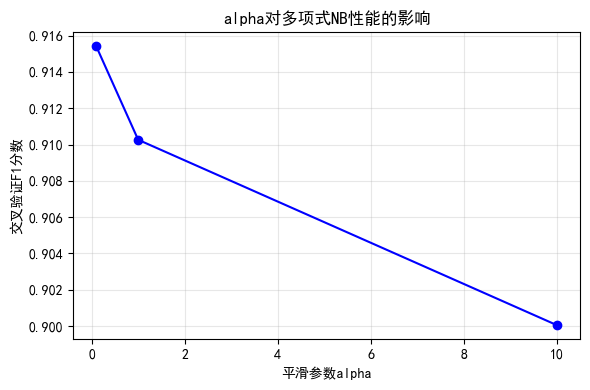

In [40]:
# 2. 文本数据集测试（新闻分类）
def test_text_data():
    # 加载数据（限制类别数量，避免输出过长）
    categories = ['sci.space', 'rec.sport.baseball']  # 仅用2个类别
    newsgroups = fetch_20newsgroups(
        subset='all',
        # 从20新闻组数据集中仅加载指定类别的数据，这里指定的类别存储在categories变量中
        categories=categories,
        remove=('headers', 'footers', 'quotes'),
        random_state=42
    )
    X_text, y = newsgroups.data, newsgroups.target
    class_names = newsgroups.target_names
    print(f"新闻数据集：{len(X_text)}样本，类别：{class_names}\n")

    # 文本特征提取（限制特征数）
    vectorizer = CountVectorizer(stop_words='english', max_features=500)  # 减少特征数
    X = vectorizer.fit_transform(X_text)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 多模型对比（简化输出）
    models = {
        '多项式NB': MultinomialNB(),
        '伯努利NB': BernoulliNB(binarize=0.0)
    }

    # 训练与评估
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"--- {name}评估 ---")
        print(f"准确率：{accuracy_score(y_test, y_pred):.4f}")
        # 简化分类报告（只显示关键指标）
        print("分类报告（简化）：")
        # 使用 sklearn 中的 classification_report 函数生成分类报告
        # 该报告包含精确率、召回率、F1 分数等评估指标
        # output_dict=True 表示将分类报告以字典的形式输出，便于后续处理
        report = classification_report(
            y_test, y_pred,
            target_names=class_names,
            output_dict=True
        )

        for cls in class_names:
            print(f"{cls}：精确率={report[cls]['precision']:.4f}, 召回率={report[cls]['recall']:.4f}")

    # 多项式NB参数调优（减少参数范围，避免输出过长）
    param_grid = {'alpha': [0.1, 1.0, 10.0]}  # 简化参数网格
    grid_search = GridSearchCV(
        MultinomialNB(),
        param_grid,
        cv=3,  # 减少交叉验证折数
        scoring='f1_macro',  # 评估指标，使用宏平均F1分数，综合考虑所有类别的F1分数
        n_jobs=-1  # 使用所有可用的CPU核心并行计算，加快搜索速度
    )
    grid_search.fit(X_train, y_train)
    print(f"最优参数：{grid_search.best_params_}")
    print(f"最优交叉验证F1：{grid_search.best_score_:.4f}\n")

    # 可视化参数影响（简化图表）
    alphas = [0.1, 1.0, 10.0]
    # 从GridSearchCV的交叉验证结果中提取平均测试分数。
    # grid_search.cv_results_ 是一个字典，包含了网格搜索过程中的各种结果信息。
    # 'mean_test_score' 是该字典的一个键，对应的值是每个参数组合在交叉验证中测试集上的平均得分。。
    mean_scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(6, 4))
    plt.plot(alphas, mean_scores, 'o-', color='b')   # 'o-' 表示使用圆点标记数据点，并使用实线连接这些点
    plt.xlabel("平滑参数alpha")
    plt.ylabel("交叉验证F1分数")
    plt.title("alpha对多项式NB性能的影响")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


print("\n=== 测试2：多项式/伯努利朴素贝叶斯（文本特征） ===")
test_text_data()

### 总结  
朴素贝叶斯是一种简单高效的分类算法，基于贝叶斯定理和特征独立性假设，在高维稀疏数据（如文本）上表现优异。实践中需注意：  
1. 根据特征类型选择合适的变体（连续特征用高斯NB，离散计数特征用多项式NB）；  
2. 对离散特征需添加平滑处理（如拉普拉斯平滑），避免似然概率为0；  
3. 训练速度极快，适合大数据场景，但受限于独立性假设，复杂关系建模能力较弱。  